### Create Latitude and Longitude Combinations

In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Generate latitudes and longitudes
# 1. They need to be stored so that we can access them later
# 2. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [39]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [40]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [41]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [42]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [43]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

In [44]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [45]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


2. Loop Through the List of Cities and Build the City URL

In [48]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 6 | albany
Processing Record 2 of Set 6 | geraldton
Processing Record 3 of Set 6 | richards bay
Processing Record 4 of Set 6 | ushuaia
Processing Record 5 of Set 6 | cape town
Processing Record 6 of Set 6 | saleaula
City not found. Skipping...
Processing Record 7 of Set 6 | qaanaaq
Processing Record 8 of Set 6 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 6 | bethel
Processing Record 10 of Set 6 | jamestown
Processing Record 11 of Set 6 | chama
Processing Record 12 of Set 6 | hermanus
Processing Record 13 of Set 6 | mataura
Processing Record 14 of Set 6 | namibe
Processing Record 15 of Set 6 | rio grande
Processing Record 16 of Set 6 | airai
Processing Record 17 of Set 6 | whitehorse
Processing Record 18 of Set 6 | nikolskoye
Processing Record 19 of Set 6 | alofi
Processing Record 20 of Set 6 | ribeira grande
Processing Record 21 of Set 6 | sitka
Processing Record 22 of Set 6 | high level
Processing Record 23 of Set 6 | punta arenas
Pr

City not found. Skipping...
Processing Record 36 of Set 9 | coihaique
Processing Record 37 of Set 9 | saint-joseph
Processing Record 38 of Set 9 | broken hill
Processing Record 39 of Set 9 | sakaiminato
Processing Record 40 of Set 9 | tiksi
Processing Record 41 of Set 9 | kaseda
Processing Record 42 of Set 9 | ilulissat
Processing Record 43 of Set 9 | cap malheureux
Processing Record 44 of Set 9 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 9 | talara
Processing Record 46 of Set 9 | port hardy
Processing Record 47 of Set 9 | nelson
Processing Record 48 of Set 9 | provideniya
Processing Record 49 of Set 9 | torbay
Processing Record 50 of Set 9 | teberda
Processing Record 1 of Set 10 | hasaki
Processing Record 2 of Set 10 | whittlesea
Processing Record 3 of Set 10 | cilegon
Processing Record 4 of Set 10 | tarime
Processing Record 5 of Set 10 | touros
Processing Record 6 of Set 10 | tocopilla
Processing Record 7 of Set 10 | churapcha
Processing Record 8 of Set 10 

Processing Record 19 of Set 13 | constitucion
Processing Record 20 of Set 13 | tezu
Processing Record 21 of Set 13 | kologriv
Processing Record 22 of Set 13 | loukhi
Processing Record 23 of Set 13 | cancun
Processing Record 24 of Set 13 | kabinda
Processing Record 25 of Set 13 | hirara
Processing Record 26 of Set 13 | pisco
Processing Record 27 of Set 13 | sedelnikovo
City not found. Skipping...
Processing Record 28 of Set 13 | zharkent
Processing Record 29 of Set 13 | aksu
Processing Record 30 of Set 13 | ridgecrest
Processing Record 31 of Set 13 | guerrero negro
Processing Record 32 of Set 13 | urucara
Processing Record 33 of Set 13 | sola
Processing Record 34 of Set 13 | san matias
Processing Record 35 of Set 13 | zhangye
Processing Record 36 of Set 13 | itapirapua
Processing Record 37 of Set 13 | eseka
Processing Record 38 of Set 13 | santiago
Processing Record 39 of Set 13 | kirkwall
Processing Record 40 of Set 13 | yumen
Processing Record 41 of Set 13 | tautira
Processing Record 

Processing Record 5 of Set 17 | te anau
Processing Record 6 of Set 17 | catuday
Processing Record 7 of Set 17 | mount isa
Processing Record 8 of Set 17 | nha trang
Processing Record 9 of Set 17 | tabialan
City not found. Skipping...
Processing Record 10 of Set 17 | yaring
Processing Record 11 of Set 17 | rabo de peixe
Processing Record 12 of Set 17 | jesup
Processing Record 13 of Set 17 | cayenne
Processing Record 14 of Set 17 | tres picos
Processing Record 15 of Set 17 | mitsamiouli
Processing Record 16 of Set 17 | tampere
Processing Record 17 of Set 17 | american canyon
Processing Record 18 of Set 17 | nuuk
Processing Record 19 of Set 17 | shelburne
Processing Record 20 of Set 17 | america dourada
Processing Record 21 of Set 17 | shakawe
Processing Record 22 of Set 17 | bairiki
Processing Record 23 of Set 17 | kokstad
Processing Record 24 of Set 17 | ivanteyevka
Processing Record 25 of Set 17 | faya
Processing Record 26 of Set 17 | hami
Processing Record 27 of Set 17 | sao joao da ba

In [49]:
# Tally the number of cities in the city_data array of dictionaries using the len() function
city_data_len = len(city_data)
city_data_len

770

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,34.52,79,97,4.00,US,2021-12-22 03:29:13
1,Geraldton,-28.7667,114.6000,77.41,61,40,16.11,AU,2021-12-22 03:29:13
2,Richards Bay,-28.7830,32.0377,68.20,92,71,12.82,ZA,2021-12-22 03:29:13
3,Ushuaia,-54.8000,-68.3000,47.86,76,20,32.21,AR,2021-12-22 03:29:14
4,Cape Town,-33.9258,18.4232,69.28,81,0,3.44,ZA,2021-12-22 03:29:14
5,Qaanaaq,77.4840,-69.3632,25.52,69,95,6.35,GL,2021-12-22 03:29:15
6,Bethel,41.3712,-73.4140,39.49,78,90,0.00,US,2021-12-22 03:29:16
7,Jamestown,42.0970,-79.2353,36.99,73,1,7.00,US,2021-12-22 03:29:16
8,Chama,47.1821,8.4636,31.89,86,90,3.44,CH,2021-12-22 03:29:17
9,Hermanus,-34.4187,19.2345,68.90,92,90,5.79,ZA,2021-12-22 03:29:17


In [51]:
# To reorder the columns, assign a variable to an array of the columns in the order we want them to appear
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
# Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-22 03:29:13,42.6001,-73.9662,34.52,79,97,4.00
1,Geraldton,AU,2021-12-22 03:29:13,-28.7667,114.6000,77.41,61,40,16.11
2,Richards Bay,ZA,2021-12-22 03:29:13,-28.7830,32.0377,68.20,92,71,12.82
3,Ushuaia,AR,2021-12-22 03:29:14,-54.8000,-68.3000,47.86,76,20,32.21
4,Cape Town,ZA,2021-12-22 03:29:14,-33.9258,18.4232,69.28,81,0,3.44
...,...,...,...,...,...,...,...,...,...
765,Nara,JP,2021-12-22 03:48:47,34.6851,135.8049,52.92,63,96,9.69
766,Oistins,BB,2021-12-22 03:49:44,13.0667,-59.5333,80.69,78,40,17.27
767,Fare,PF,2021-12-22 03:49:44,-16.7000,-151.0167,78.22,80,96,18.88
768,Severo-Yeniseyskiy,RU,2021-12-22 03:49:45,60.3725,93.0408,-18.74,93,80,3.51


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Retrieve the data we need to create our scatter plot
# - latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

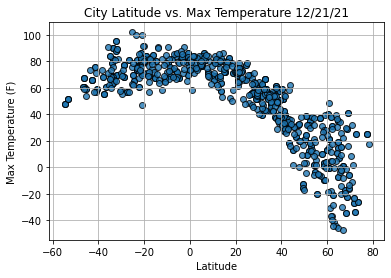

In [54]:
## Plot Latitude vs. Temperature
# To create a scatter plot for the latitude vs. maximum temperature

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

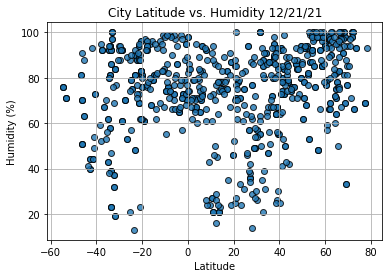

In [55]:
## Plot Latitude vs. Humidity
# Repurpose the code above the maximum temperature scatter plot 
# and create a scatter plot for the latitude versus humidity.

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Change the y-axis variable to "humidity," 
# the title to "Humidity," and the y-axis label to "Humidity (%)."

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


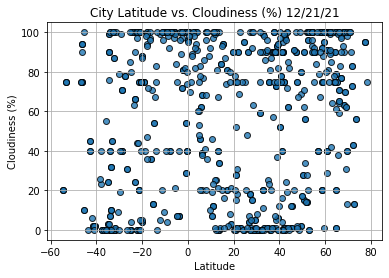

In [56]:
## Plot Latitude vs. Cloudiness
# - refactor the above code by changing the y-axis variable to "cloudiness," 
#   the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)"

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

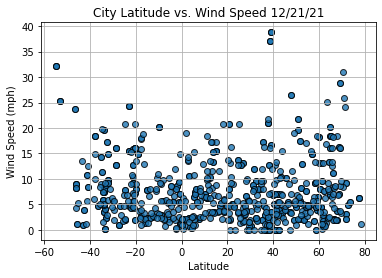

In [57]:
## Plot Latitude vs. Wind Speed
# - repurpose the code above by changing the y-axis variable to "wind speed," 
#   the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)"

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()